## 🎨 **Extracting Dominant Colors from an Image using K-Means Clustering**


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as pltQ

In [28]:

def centroid_histogram(clustering):
    # clustering.labels_ contains the cluster index (0,1,2,...) for every pixel
    # Example: [0, 0, 1, 2, 2, 2, 1, ...]
    labels = clustering.labels_

    # Print all unique cluster labels present in the image
    # This confirms how many clusters were actually formed
    print("Different Labels ==> ", np.unique(labels))

    # Count total number of unique clusters
    # If KMeans was set to 5, this should usually be 5
    num_clusters = len(np.unique(labels))

    # Create histogram bins from 0 to num_clusters
    # Example for 5 clusters → bins = [0,1,2,3,4,5]
    bins = np.arange(0, num_clusters + 1)

    # Count how many pixels belong to each cluster
    # hist[i] = number of pixels assigned to cluster i
    hist, _ = np.histogram(labels, bins=bins)
    print('Hist Before Float ==> ',hist)

    # Convert histogram values to float
    # This helps during normalization
    hist = hist.astype("float")    
    print('Hist After Float ==> ',hist)

    # Divide each cluster count by total number of pixels
    # This gives percentage contribution of each color
    hist /= hist.sum()
    print('Hist Percentage Clc ==> ',hist)

    # Final histogram represents:
    # how much each dominant color contributes to the image
    return hist


def plot_colors(hist, centroids, bar_height=100, bar_width=500):

    # Empty image for color bar (height x width x RGB)
    bar = np.zeros((bar_height, bar_width, 3), dtype="uint8")

    # Starting x-position for first color block
    start_x = 0

    # Loop through each color and its percentage
    for percentage, color in zip(hist, centroids):

        # Ending x-position based on color percentage
        end_x = start_x + int(percentage * bar_width)
        print(f'End_x {color} ==> ',end_x)

        # Draw rectangle for current dominant color
        cv2.rectangle(
            bar,
            (int(start_x), 0),
            (int(end_x), bar_height),
            color.astype("uint8").tolist(),
            -1
        )

        # Update starting x-position for next color
        start_x = end_x

    # Final color distribution bar
    return bar

Image Shape ==>  (1200, 717, 3)
Image ==>  [[ 2 15  0]
 [ 0 10  0]
 [ 7 35  0]
 ...
 [19 72  0]
 [21 74  0]
 [30 82  7]]
Length Image ==>  860400
Number Pixels ==>  860400
Clusters Labels ==>  [2 2 2 ... 2 2 2]
Length Clusters Labels ==>  860400
Clusters Centers ==>  [[161.25165087   8.89952494  16.09487212]
 [ 79.54490688 118.20895819  43.8797004 ]
 [ 20.49135972  45.61732949   8.23439551]
 [221.51327242 182.11019114 171.7669899 ]
 [184.65903832 135.93911204  62.90420094]]
Different Labels ==>  [0 1 2 3 4]
Hist Before Float ==>  [134922 241322 211970 125186 147000]
Hist After Float ==>  [134922. 241322. 211970. 125186. 147000.]
Hist Percentage Clc ==>  [0.15681311 0.28047652 0.24636216 0.14549744 0.17085077]
End_x [161.25165087   8.89952494  16.09487212] ==>  78
End_x [ 79.54490688 118.20895819  43.8797004 ] ==>  218
End_x [20.49135972 45.61732949  8.23439551] ==>  341
End_x [221.51327242 182.11019114 171.7669899 ] ==>  413
End_x [184.65903832 135.93911204  62.90420094] ==>  498


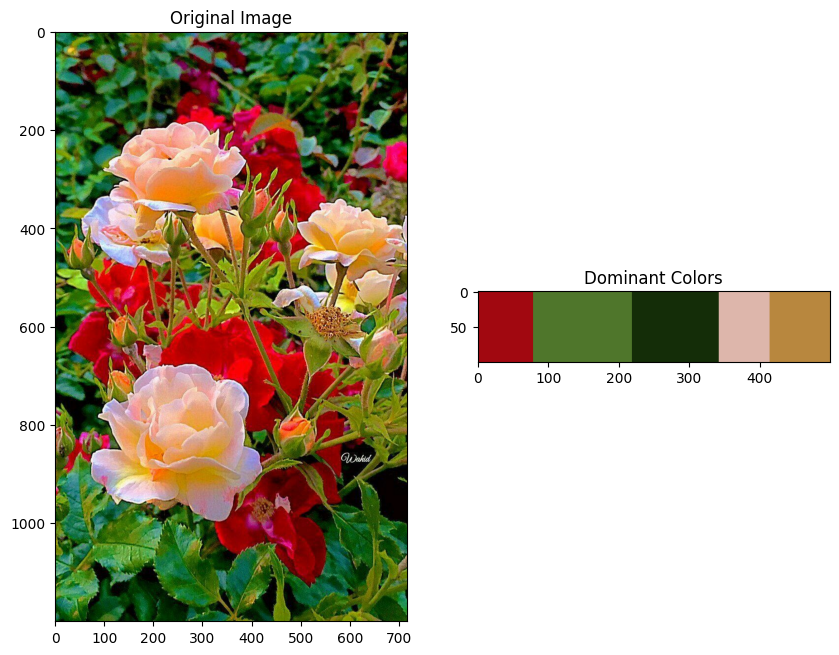

Image Shape ==>  (798, 1200, 3)
Image ==>  [[31 44  1]
 [32 45  2]
 [33 46  3]
 ...
 [46 66  3]
 [49 69 10]
 [55 75 16]]
Length Image ==>  957600
Number Pixels ==>  957600
Clusters Labels ==>  [0 0 0 ... 0 3 3]
Length Clusters Labels ==>  957600
Clusters Centers ==>  [[ 33.5858575   42.35166385  11.50300676]
 [ 94.17063248 107.65804947  53.43565377]
 [126.96517501 138.94790264  91.32964328]
 [ 60.89707825  73.43497     27.37199035]
 [166.94461752 176.62971931 138.21708822]]
Different Labels ==>  [0 1 2 3 4]
Hist Before Float ==>  [250864 199978 164442 277152  65164]
Hist After Float ==>  [250864. 199978. 164442. 277152.  65164.]
Hist Percentage Clc ==>  [0.2619716  0.2088325  0.17172306 0.28942356 0.06804929]
End_x [33.5858575  42.35166385 11.50300676] ==>  130
End_x [ 94.17063248 107.65804947  53.43565377] ==>  234
End_x [126.96517501 138.94790264  91.32964328] ==>  319
End_x [60.89707825 73.43497    27.37199035] ==>  463
End_x [166.94461752 176.62971931 138.21708822] ==>  497


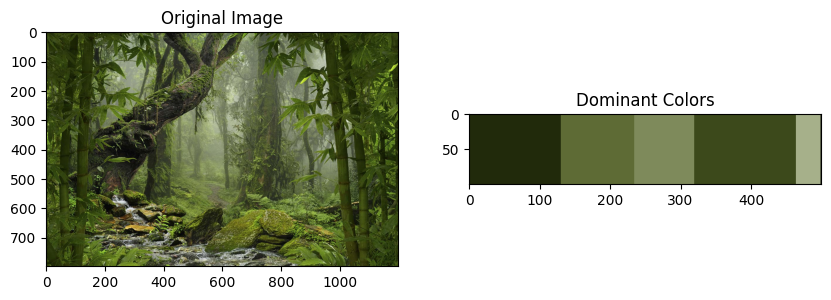

Image Shape ==>  (421, 612, 3)
Image ==>  [[164 170 192]
 [125 135 160]
 [ 55  69  98]
 ...
 [206 212 228]
 [210 216 232]
 [211 217 233]]
Length Image ==>  257652
Number Pixels ==>  257652
Clusters Labels ==>  [3 4 1 ... 0 2 2]
Length Clusters Labels ==>  257652
Clusters Centers ==>  [[187.72530707 199.3390369  221.62793832]
 [ 63.77124036  70.36892731  82.66180103]
 [219.87049484 227.11162359 242.57231429]
 [152.74905484 163.84865811 186.10317386]
 [108.4490736  118.31559589 137.33573958]]
Different Labels ==>  [0 1 2 3 4]
Hist Before Float ==>  [72853 26638 86415 42743 29003]
Hist After Float ==>  [72853. 26638. 86415. 42743. 29003.]
Hist Percentage Clc ==>  [0.28275736 0.10338751 0.33539425 0.16589431 0.11256656]
End_x [187.72530707 199.3390369  221.62793832] ==>  141
End_x [63.77124036 70.36892731 82.66180103] ==>  192
End_x [219.87049484 227.11162359 242.57231429] ==>  359
End_x [152.74905484 163.84865811 186.10317386] ==>  441
End_x [108.4490736  118.31559589 137.33573958] ==>  4

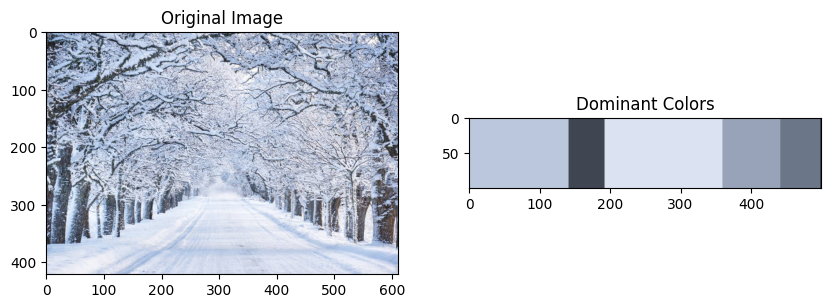

Image Shape ==>  (642, 1024, 3)
Image ==>  [[109  85  85]
 [108  84  84]
 [107  81  80]
 ...
 [ 42  49  18]
 [ 41  57   0]
 [ 24  40   0]]
Length Image ==>  657408
Number Pixels ==>  657408
Clusters Labels ==>  [4 4 4 ... 1 1 1]
Length Clusters Labels ==>  657408
Clusters Centers ==>  [[240.11318807 204.39703524 142.29375977]
 [ 39.03231755  53.95144822   9.17771697]
 [186.68648554 148.64404011  28.26263683]
 [172.72019835 135.46401003 113.13646061]
 [ 97.54488218  90.95386957  62.50369862]]
Different Labels ==>  [0 1 2 3 4]
Hist Before Float ==>  [ 99795 151702 108839 123080 173992]
Hist After Float ==>  [ 99795. 151702. 108839. 123080. 173992.]
Hist Percentage Clc ==>  [0.15180071 0.23075776 0.16555777 0.18722011 0.26466365]
End_x [240.11318807 204.39703524 142.29375977] ==>  75
End_x [39.03231755 53.95144822  9.17771697] ==>  190
End_x [186.68648554 148.64404011  28.26263683] ==>  272
End_x [172.72019835 135.46401003 113.13646061] ==>  365
End_x [97.54488218 90.95386957 62.50369862]

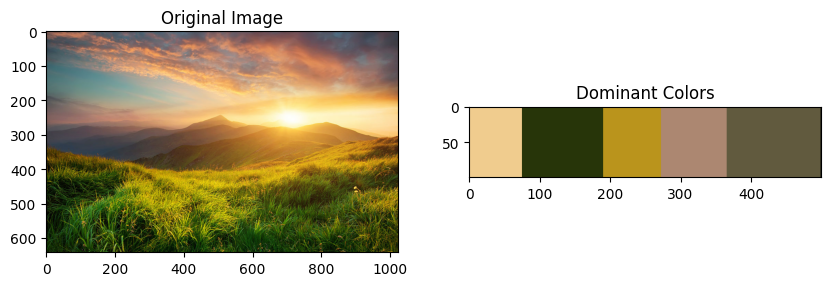

In [ ]:
from sklearn.cluster import KMeans
import os

img_fld = 'input_images'
img_files = os.listdir(img_fld)


for file in img_files:
    img_path = os.path.join(img_fld,file)

    # Read image from disk (BGR format by default)
    image = cv2.imread(img_path)

    # Convert image from BGR to RGB
    image_org = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Print original image shape (Height, Width, Channels)
    print("Image Shape ==> ", image_org.shape)

    # Reshape image to 2D array of pixels (N x 3)
    image = image_org.reshape((image.shape[0] * image.shape[1], 3))

    # Total number of pixels
    print('Image ==> ', image)
    print('Length Image ==> ', len(image))
    print('Number Pixels ==> ', image_org.shape[0] * image_org.shape[1])

    # Number of dominant colors to extract
    number_of_clusters = 5Q

    # Initialize KMeans with 5 clusters
    clt = KMeans(n_clusters=number_of_clusters)

    # Fit KMeans on pixel data
    clt.fit(image)

    # Cluster labels for each pixel
    print('Clusters Labels ==> ', clt.labels_)
    print('Length Clusters Labels ==> ', len(clt.labels_))

    # RGB values of cluster centers (dominant colors)
    print('Clusters Centers ==> ', clt.cluster_centers_)

    # KMeans gives 5 RGB color values
    # These colors represent the dominant colors in the image
    # But this does not tell which color appears the most
    # It also does not tell which color appears the least
    # It does not indicate which color belongs to background
    # So cluster centers tell WHAT colors exist, not HOW MUCH each color appears

    # Create histogram of cluster frequencies
    hist = centroid_histogram(clt)

    # Create color bar visualization
    bar = plot_colors(hist, clt.cluster_centers_)

    # Plot original image and dominant color bar
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax = ax.ravel()

    ax[0].imshow(image_org)
    ax[0].set_title("Original Image")

    ax[1].imshow(bar)
    ax[1].set_title("Dominant Colors")

    plt.show()
